# Pose Detection with OpenPose

This notebook uses an open source project [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).

## Attaching google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import os
os.chdir("drive/My Drive/tremor recognition")

## Here is working cell.
## It compiles openpose library.

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd openpose && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

## Check if youtube module works

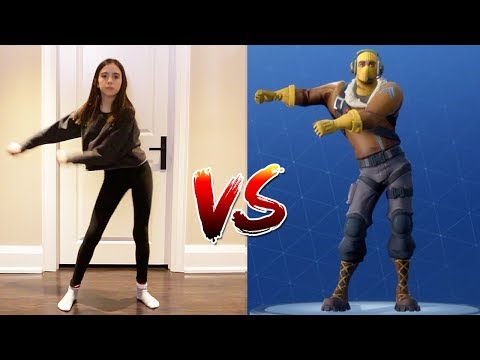

In [5]:
from IPython.display import YouTubeVideo
YOUTUBE_ID = 'RXABo9hm8B8'


YouTubeVideo(YOUTUBE_ID)

In [0]:
!rm -rf youtube.mp4

## Create output folders for current video

In [0]:
video_name = "20190918_115127_cutted"

In [0]:
for file_type in ['json', 'video']:
  out_dir = os.path.join("/content/drive/My Drive/tremor recognition/output", file_type, video_name.split('.')[0])
  if not os.path.isdir(out_dir):
    os.makedirs(out_dir)

## Cut current video

In [87]:
!ffmpeg -ss 9 -y -loglevel info \
    -i "/content/drive/My Drive/tremor recognition/video/20190918_115127.mp4" \
    -t 5 "/content/drive/My Drive/tremor recognition/video/20190918_115127_cutted.mp4"

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

## Process current video

In [0]:
full_input_video_path = os.path.join("/content/drive/My Drive/tremor recognition/video", video_name + '.mp4')
full_json_out_dir = os.path.join("/content/drive/My Drive/tremor recognition/output/json", video_name)
full_video_out_path = os.path.join("/content/drive/My Drive/tremor recognition/output/video", video_name, 'openpose.avi')

In [0]:
!cd /content/openpose && ./build/examples/openpose/openpose.bin \
    --hand --hand_scale_number 6 --hand_scale_range 0.4 \
    --video "$full_input_video_path" \
    --write_json "$full_json_out_dir" \
    --display 0  \
    --write_video "$full_video_out_path" 

Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.


## Convert to mp4

In [90]:
full_video_out_path_mp4 = full_input_video_path.split('.')[0]+'.mp4'
# convert the result into MP4
!ffmpeg -y -loglevel info \
    -i "$full_video_out_path" \
    "$full_video_out_path_mp4"

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

## Show the output

In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [92]:
show_local_mp4_video(full_video_out_path_mp4)

Output hidden; open in https://colab.research.google.com to view.

## Compress all json

In [84]:
zipped_json_file_path = os.path.join(full_json_out_dir, 'keypoints.zip')
!zip -r "$zipped_json_file_path" "$full_json_out_dir"

  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/ (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000000_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000001_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000002_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000003_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000004_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_135639_000000000005_keypoints.json (stored 0%)
  adding: content/drive/My Drive/tremor recognition/output/json/20190918_135639/20190918_13

In [56]:
print(to_rm)

/content/drive/My Drive/tremor recognition/output/json/20190918_115127/*


In [69]:
to_rm = full_json_out_dir + '/*.json'
! rm -r '$to_rm' 

rm: cannot remove '/content/drive/My Drive/tremor recognition/output/json/20190918_115127/*.json': No such file or directory


In [51]:
show_local_mp4_video(full_video_out_path_mp4)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
!zip -r /content/openpose.zip /content/openpose


In [0]:
from google.colab import files

try:
  files.download(zipped_json_file_path)
except ConnectionResetError:
  print ("ConnectionResetError, but it is okay.")

In [0]:
!cd openpose/output && rm *

## Check json files existense

In [20]:
!cd openpose/output && ls

/bin/bash: line 0: cd: openpose/output: No such file or directory


In [0]:
!cd openpose/output && ls | wc -l

48


## Create json archive

In [0]:
!zip -r /content/output.zip /content/openpose/output


## Check google drive folder

In [37]:
!cd "drive/My Drive/tremor recognition" \
&& ls


openpose  openpose.zip	output.zip  TestOpenPose.ipynb	video


In [0]:
os.chdir("../../..")

## Copy zips to google drive

In [0]:
!cp -r "/content/openpose.zip" "/content/drive/My Drive/tremor recognition"

In [0]:
!cp -r "/content/output.zip" "/content/drive/My Drive/tremor recognition"

In [0]:
import shutil
shutil.move("openpose", "drive/My Drive/tremor recognition")

## Unzip openpose folder

## Download Openpose folder

## Remove openpose from drive

In [0]:
!rm -rf "drive/My Drive/tremor recognition/openpose"

In [0]:
!cp "drive/My Drive/Colab Notebooks/videos/patient07_07_2_ex1_2019-01-25 09_47_55.avi" .



In [0]:
!cp "drive/My Drive/Colab Notebooks/videos/patient22_22_ex6_2019-01-31 10_20_15_Trim.avi" .

In [36]:
!cd 'drive/My Drive/Colab Notebooks/videos/' && ls

/bin/bash: line 0: cd: drive/My Drive/Colab Notebooks/videos/: No such file or directory


## Detect poses on a test video

We are going to detect poses on the following youtube video:

In [0]:
!cd ../.. && ls

bin	 datalab  home	 lib64	opt   run   swift		  tmp	 var
boot	 dev	  lib	 media	proc  sbin  sys			  tools
content  etc	  lib32  mnt	root  srv   tensorflow-2.0.0-rc0  usr


Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

## Download YouTube video

In [16]:
!pip install -q youtube-dl
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID


     |████████████████████████████████| 1.8MB 3.5MB/s 
[youtube] RXABo9hm8B8: Downloading webpage
[youtube] RXABo9hm8B8: Downloading video info webpage
[download] Destination: youtube.mp4
[download]  14.8% of 77.42MiB at 11.01KiB/s ETA 01:42:16
ERROR: Interrupted by user
^C


## Get json and mp4 files from the video

In [0]:
import os
drive_path = "/content/drive/My Drive/tremor recognition/"
relative_video_path = "video/patient07_07_2_ex1_2019-01-25 09_47_55_cut.avi"
openpose_path = os.path.join(drive_path, "openpose/content/openpose")
full_video_path = os.path.join(drive_path, relative_video_path)

In [38]:
!cd "/content/drive/My Drive/tremor recognition/openpose" && ls

content


In [0]:
# cut the first 2 seconds
!ffmpeg -y -loglevel info -i "/content/drive/My Drive/tremor recognition/video/patient07_07_2_ex1_2019-01-25 09_47_55.avi" \
                          -t 10 "/content/drive/My Drive/tremor recognition/video/patient07_07_2_ex1_2019-01-25 09_47_55_cut.avi"


In [54]:
# detect poses on the these 2 seconds
# !rm openpose.avi
!cd "/content/openpose" \
  && ./build/examples/openpose/openpose.bin \
  --render_pose 0 --face --face_render 1 --hand --hand_render 1 \
  --video "/content/drive/My Drive/tremor recognition/video/patient07_07_2_ex1_2019-01-25 09_47_55_cut.avi" \
  --write_json "/content/drive/My Drive/tremor recognition/output/json" --display 0 \
  --write_video "/content/drive/My Drive/tremor recognition/output/video/output_video.avi"


Starting OpenPose demo...
Configuring OpenPose...
Starting thread(s)...
Auto-detecting all available GPUs... Detected 1 GPU(s), using 1 of them starting at GPU 0.
OpenPose demo successfully finished. Total time: 94.379295 seconds.


In [55]:
# convert the result into MP4
!ffmpeg -y -loglevel info -i "/content/drive/My Drive/tremor recognition/output/video/output_video.avi" \
                              "/content/drive/My Drive/tremor recognition/output/video/output_mp4_video.mp4"

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [56]:
show_local_mp4_video("/content/drive/My Drive/tremor recognition/output/video/output_mp4_video.mp4")

In [0]:
./build/examples/openpose/openpose.bin --render_pose 0 --face --face_render 1 --hand --hand_render 1

In [0]:

!cd openpose && ./build/examples/openpose/openpose.bin --hand --hand_render 2 --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

In [0]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

In [52]:
show_local_mp4_video("/content/drive/My Drive/tremor recognition/output/video/output_mp4_video.mp4")

In [0]:
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

Finally, visualize the result:

In [0]:
!ffmpeg -y -loglevel info -i 'patient22_22_ex6_2019-01-31 10_20_15_Trim.avi' -t 10 video_ours.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video_ours.mp4 --write_json ./output/ --display 0  --write_video ../openpose_ours.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose_ours.avi output_ours.mp4

In [0]:
show_local_mp4_video('output_ours.mp4')

In [0]:
# build openpose for Alexey
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CMU-Perceptual-Computing-Lab/openpose.git'
project_name = splitext(basename(git_repo_url))[0] + "Alexey"
if not exists(project_name):
  # see: https://github.com/CMU-Perceptual-Computing-Lab/openpose/issues/949
  # install new CMake becaue of CUDA10
  !wget -q https://cmake.org/files/v3.13/cmake-3.13.0-Linux-x86_64.tar.gz
  !tar xfz cmake-3.13.0-Linux-x86_64.tar.gz --strip-components=1 -C /usr/local
  # clone openpose
  !cd 'drive/My Drive/Colab Notebooks/' && git clone -q --depth 1 $git_repo_url
  !sed -i 's/execute_process(COMMAND git checkout master WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/execute_process(COMMAND git checkout f019d0dfe86f49d1140961f8c7dec22130c83154 WORKING_DIRECTORY ${CMAKE_SOURCE_DIR}\/3rdparty\/caffe)/g' openpose/CMakeLists.txt
  # install system dependencies
  !apt-get -qq install -y libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler libgflags-dev libgoogle-glog-dev liblmdb-dev opencl-headers ocl-icd-opencl-dev libviennacl-dev
  # install python dependencies
  !pip install -q youtube-dl
  # build openpose
  !cd 'drive/My Drive/Colab Notebooks/openpose' && rm -rf build || true && mkdir build && cd build && cmake .. && make -j`nproc`
  
from IPython.display import YouTubeVideo

^C
tar (child): cmake-3.13.0-Linux-x86_64.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now
/bin/bash: line 0: cd: drive/My Drive/Colab Notebooks/: No such file or directory


In [0]:
!unzip "/content/drive/My Drive/tremor recognition/openpose.zip" -d "/content/drive/My Drive/tremor recognition/openpose"